## Observations and Insights 

In [218]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge (mouse_metadata, study_results,on= "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [219]:
# Checking the number of mice.
num_mice= combined_data["Mouse ID"].nunique()
print (num_mice)

249


In [220]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID= combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [221]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean= combined_data[combined_data["Mouse ID"].isin(duplicate_ID)==False]
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [222]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [223]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume= clean['Tumor Volume (mm3)'].mean()
median_tumor_volume= clean['Tumor Volume (mm3)'].median()
variance_tumor_volume= clean['Tumor Volume (mm3)'].var()
sd_tumor_volume= clean['Tumor Volume (mm3)'].std()
sem_tumor_volume= clean['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).mean()
median= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).median()
var= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).var()
sd= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).std()
sem= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.
summary_df= pd.DataFrame ({"Mean Tumor Volume": mean,
                          "Median Tumor Volume":median,
                          "Tumor Volume Variance": var,
                          "Tumor Volume Standard Dev":sd,
                          "Tumor Volume SEM": sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [224]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg= clean.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]]. agg (['mean', 'median','var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

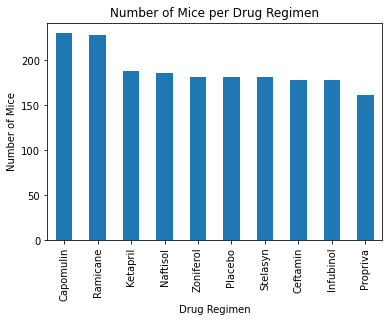

In [225]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_pandas= combined_data['Drug Regimen'].value_counts().plot.bar()
bar_pandas
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title("Number of Mice per Drug Regimen")

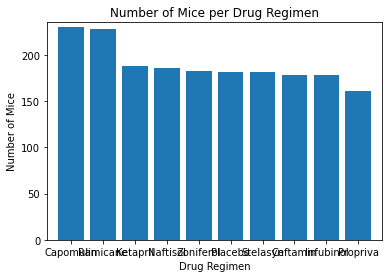

In [226]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_pyplot=combined_data['Drug Regimen'].value_counts()

x_axis= bar_pyplot.index.values
y_axis= bar_pyplot.values

plt.bar(x_axis, y_axis)
tick_locations=[value for value in x_axis]
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis) + 5)

plt.show()


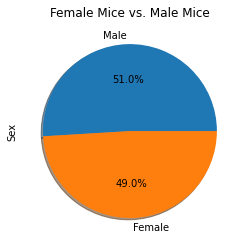

In [227]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data=clean["Sex"].value_counts()

plt.title ("Female Mice vs. Male Mice")
gender_data.plot.pie (autopct="%1.1f%%", shadow=True)
plt.show()

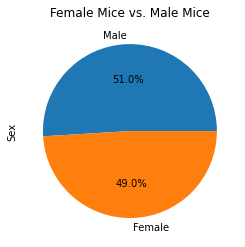

In [228]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot=clean ["Sex"].value_counts()

plot= gender_data.plot.pie(autopct="%1.1f%%")
plt.title ("Female Mice vs. Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [229]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=pd.DataFrame (combined_data.groupby("Mouse ID")["Timepoint"].max().sort_values())
greatest_timepoint.reset_index().rename(columns={"Timepoint":"max_timepoint"})
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
info_df=pd.merge(combined_data, greatest_timepoint, on="Mouse ID")
info_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [230]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol",
"Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data=info_df.loc[info_df["Drug Regimen"]==treatment]
    # add subset 
    final_df=drug_data.loc[drug_data["Timepoint_x"]==drug_data["Timepoint_y"]]
    values=final_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(values)
    
    # Determine outliers using upper and lower bounds
    quartiles=values.quantile([0.25, 0.5, 0.75])
    lowerq=quartiles [0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

print(f"The interquartile range of treatment is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check for outliers
outliers_count=(values.loc[(final_df["Tumor Volume (mm3)"]>= upper_bound) |
                         (final_df["Tumor Volume (mm3)"]<= lower_bound)]).count()

print (f"Number of {treatment}: {lower_bound}")
print (f"Number of {treatment}: {upper_bound}")  

The interquartile range of treatment is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Number of Ceftamin: 25.355449580000002
Number of Ceftamin: 87.66645829999999


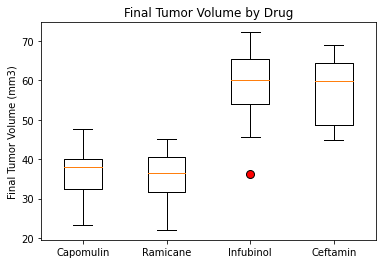

In [231]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, flierprops=flierprops)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

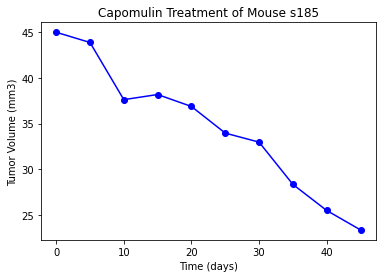

In [232]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
info_df.loc[info_df['Drug Regimen'] == 'Capomulin'].head(10)

mouse = info_df.loc[info_df['Mouse ID'] == 's185']
plt.plot(mouse['Timepoint_x'], mouse['Tumor Volume (mm3)'], marker='o', color = 'b')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

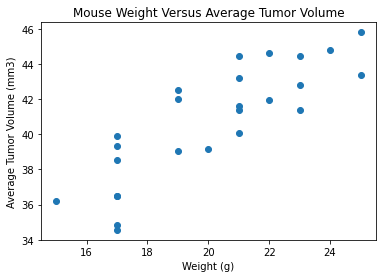

In [233]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = clean.loc[clean["Drug Regimen"] == "Capomulin",:]
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [234]:
# Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The correlation between weight and average tumor volume for Capomulin regimen is 0.84


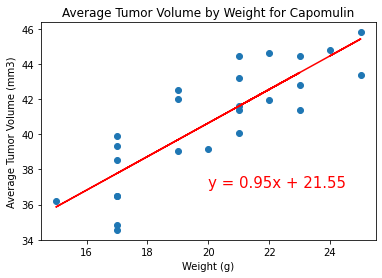

In [235]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_vol_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df

avg_vol_df = pd.merge(Capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['avg_tumor_vol']

#--------------------------------------------------------

correlation = st.pearsonr(x_data, y_data)
print(f'The correlation between weight and average tumor volume for Capomulin regimen is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and linear regression
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, 'r-')
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight for Capomulin')
plt.show()